# Importing required libraries and the dataset:

In [1]:
import pyforest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from graphviz import Source

In [2]:
df = pd.read_csv(r'C:\Users\SHARVARI AVHAD\Desktop\SEM_4\PR Datasets\Iris.csv')
df.head()

<IPython.core.display.Javascript object>

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,<5.8,>3.0,<4.35,<1.3,Iris-setosa
1,<5.8,<3.0,<4.35,<1.3,Iris-setosa
2,<5.8,>3.0,<4.35,<1.3,Iris-setosa
3,<5.8,>3.0,<4.35,<1.3,Iris-setosa
4,<5.8,>3.0,<4.35,<1.3,Iris-setosa


# Changing the Dtype of column Species:

In [3]:
Species = pd.get_dummies(df['Species'])
df = pd.concat([df, Species], axis=1)
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,<5.8,>3.0,<4.35,<1.3,Iris-setosa,1,0,0
1,<5.8,<3.0,<4.35,<1.3,Iris-setosa,1,0,0
2,<5.8,>3.0,<4.35,<1.3,Iris-setosa,1,0,0
3,<5.8,>3.0,<4.35,<1.3,Iris-setosa,1,0,0
4,<5.8,>3.0,<4.35,<1.3,Iris-setosa,1,0,0


# Mapping of the features:

In [4]:
df['SepalLengthCm'] = df['SepalLengthCm'].map({'<5.8':0,'>5.8':1})
df['SepalWidthCm'] = df['SepalWidthCm'].map({'<3.0':0,'>3.0':1})
df['PetalLengthCm'] = df['PetalLengthCm'].map({'<4.35':0,'>4.35':1})
df['PetalWidthCm'] = df['PetalWidthCm'].map({'<1.3':0,'>1.3':1})

In [5]:
x = df.loc[:,('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,1,0,0
1,0,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [6]:
y = df.loc[:,('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')]
y.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


# Selecting the best features: 

In [7]:
best = SelectKBest(chi2, k=2).fit(x,y)
cols = best.get_support(indices=True)
cols

array([2, 3], dtype=int32)

In [8]:
x_new = x.iloc[:,cols]
x_new.head()

,PetalLengthCm,PetalWidthCm
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Creating the decision tree:

In [9]:
x_tr, x_test, y_tr, y_test = train_test_split(x,y, test_size=.2)

<IPython.core.display.Javascript object>

In [10]:
dtree_id = DecisionTreeClassifier(criterion = 'entropy').fit(x_tr, y_tr)
graph = Source(tree.export_graphviz(dtree_id, filled=True, feature_names = x_tr.columns))
graph.format = 'png'
graph.render('dtree_render', view=True)

'dtree_render.png'

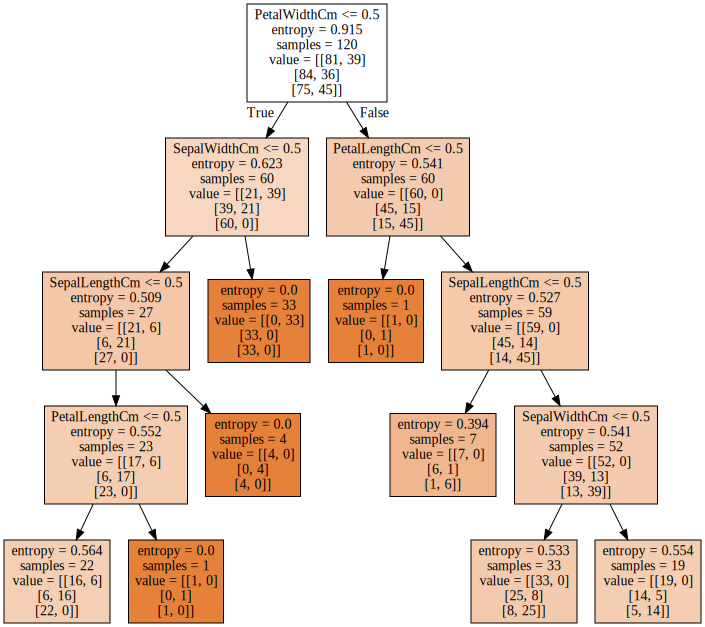

In [11]:
graph

### Here, we get PetalWidth as the base of the Decision Tree which is this validated.